## Titanic Survived Predicition ::

In [1]:
import pandas as pd

##### Load the dataset ::

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Check the null value and remove the null value ::

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df = df.drop(columns ='Cabin', axis=1)

In [7]:
df["Age"].fillna(df["Age"].mean(),inplace = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_17868\1588258379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace = True)


In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
print(df['Embarked'].mode())
print(df['Embarked'].mode()[0])
df['Embarked'].fillna(df["Embarked"].mode()[0] , inplace = True)

0    S
Name: Embarked, dtype: object
S


C:\Users\PC\AppData\Local\Temp\ipykernel_17868\2547423507.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df["Embarked"].mode()[0] , inplace = True)


##### Exploratory Data Analysis ::

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Plots :: Historogram plots :

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

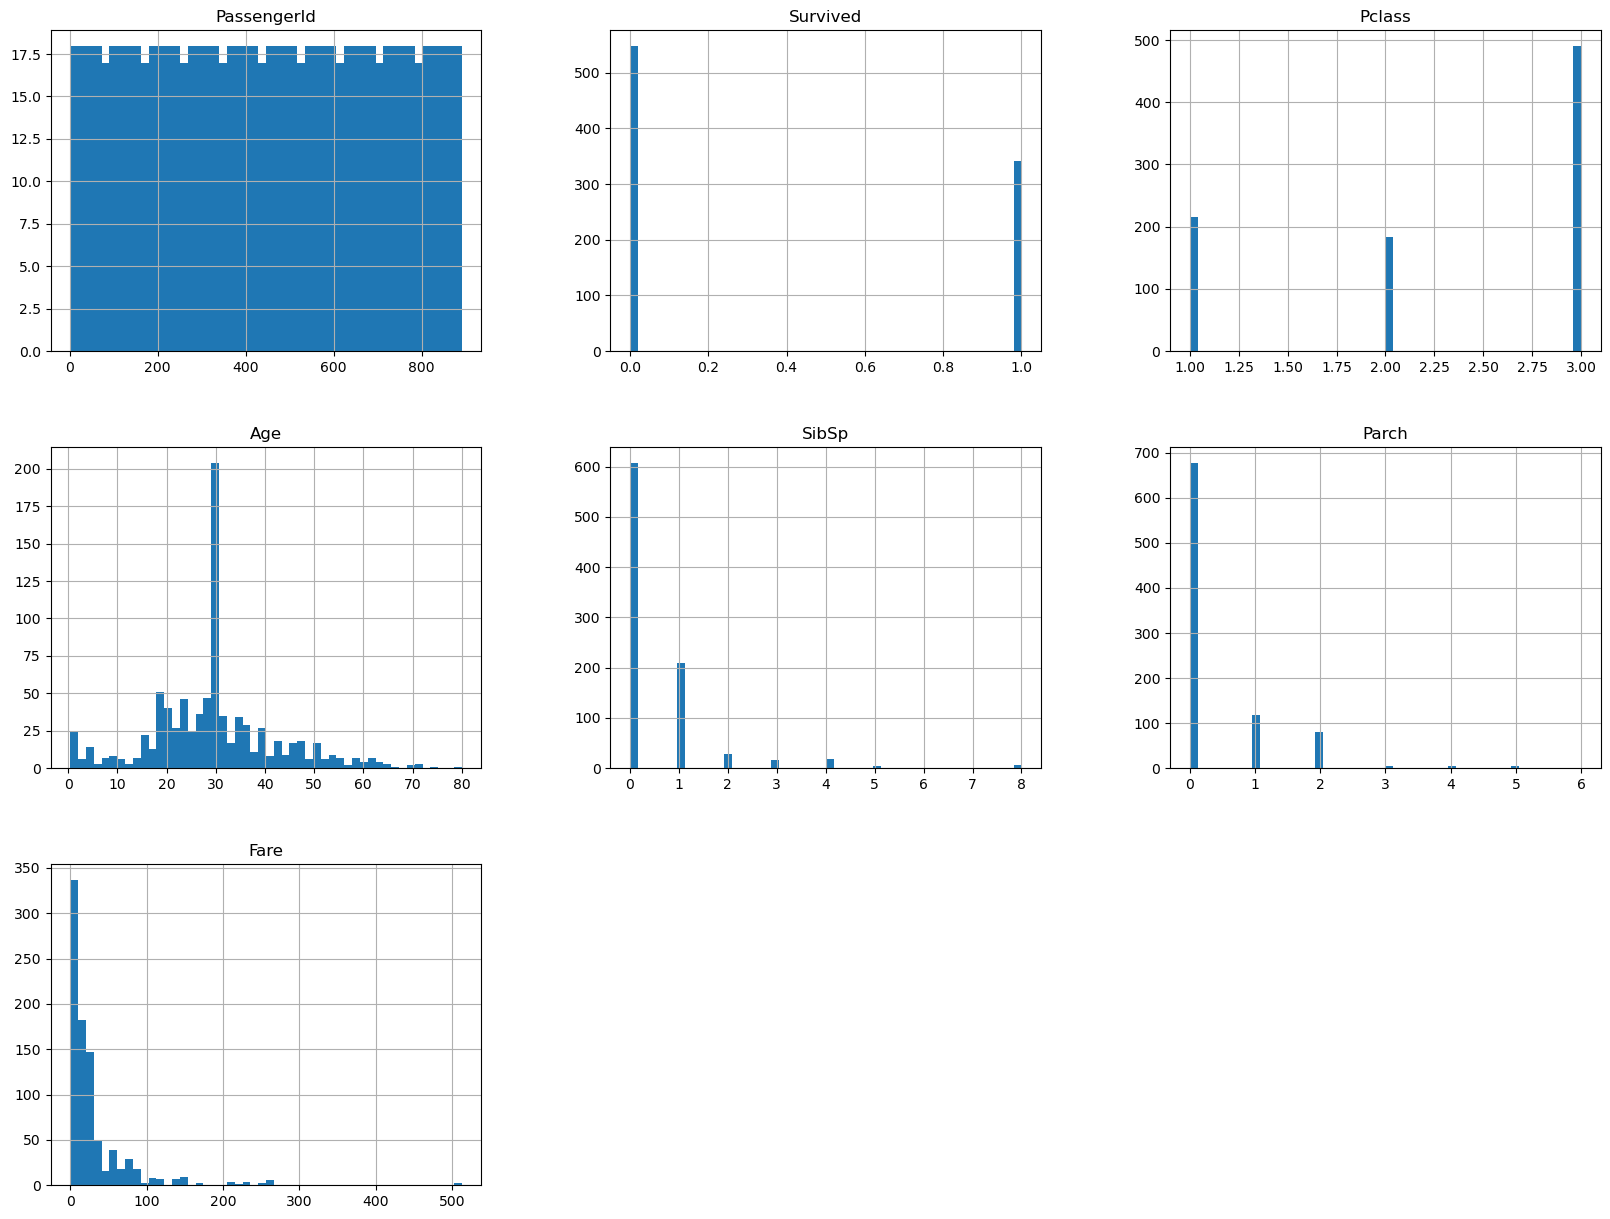

In [11]:
import matplotlib.pyplot as plt
df.hist(bins=50 , figsize=(20,15))

<Axes: ylabel='count'>

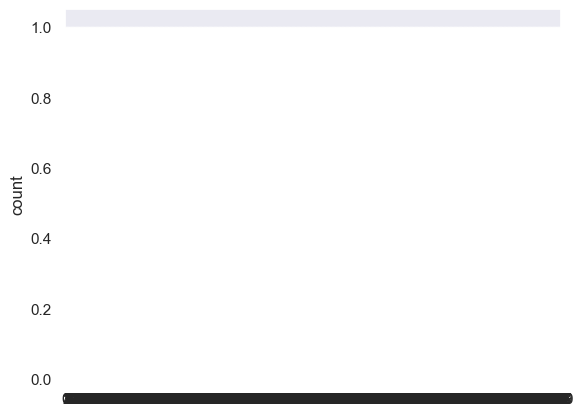

In [12]:
import seaborn as sns
sns.set()
sns.countplot(df["Survived"])

In [13]:
#Count the Sex columns in Females and Males :
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

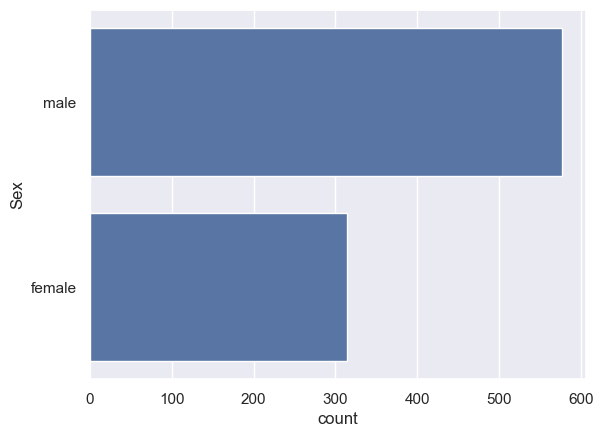

In [14]:
#countplot of the Sex columns ::
sns.countplot(df["Sex"])

<Axes: xlabel='Sex', ylabel='count'>

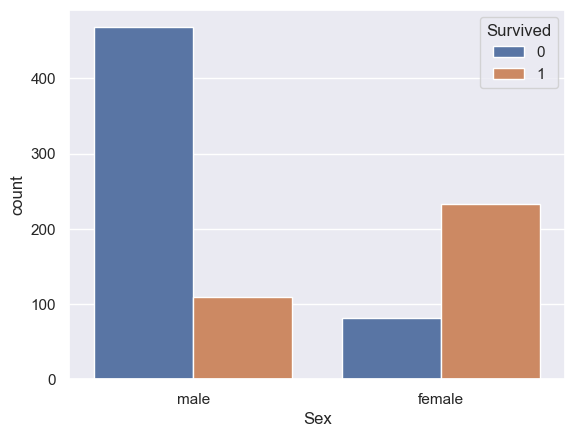

In [15]:
# Analysis the surviving by gender ::
sns.countplot(x="Sex", hue="Survived", data=df)

<Axes: xlabel='Pclass', ylabel='count'>

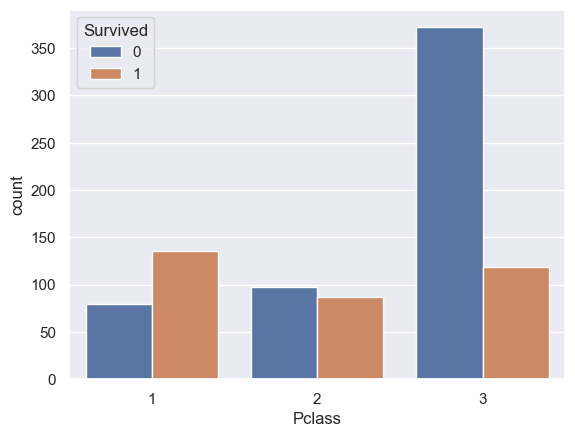

In [16]:
# countplots of the Pclass ::
sns.countplot(x="Pclass", hue="Survived", data=df)

In [17]:
df.replace({'Sex':{'male':0 , 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}})

C:\Users\PC\AppData\Local\Temp\ipykernel_17868\2583889998.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':0 , 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [18]:
x= df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']

In [19]:
print(x)

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0         3    male  22.000000      1      0   7.2500        S
1         1  female  38.000000      1      0  71.2833        C
2         3  female  26.000000      0      0   7.9250        S
3         1  female  35.000000      1      0  53.1000        S
4         3    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
886       2    male  27.000000      0      0  13.0000        S
887       1  female  19.000000      0      0  30.0000        S
888       3  female  29.699118      1      2  23.4500        S
889       1    male  26.000000      0      0  30.0000        C
890       3    male  32.000000      0      0   7.7500        Q

[891 rows x 7 columns]


In [20]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


##### Traning and Testing the data model ::

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [23]:
print(x.shape , x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


##### Logistic-Regression data model ::

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [25]:
#labelencoding use to the Sex data value can 'String to Float' convert :
encoder = LabelEncoder()
x_train['Sex'] = encoder.fit_transform(x_train['Sex'])
x_test['Sex'] = encoder.transform(x_test['Sex'])

In [26]:
#label encoding use to the Embarked data value can 'String to Float' covert :
encoder = LabelEncoder()
x_train['Embarked'] = encoder.fit_transform(x_train['Embarked'])
x_test['Embarked'] = encoder.transform(x_test['Embarked'])

In [27]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##### Confusion Matrix ::

In [28]:
x_train_prediction = model.predict(x_train)
print(x_train_prediction)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

##### Calculate the traning and testing model Accuracy Score ::

In [33]:
from sklearn.metrics import accuracy_score
traning_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy score of training data ::', traning_data_accuracy)

Accuracy score of training data :: 0.8019662921348315


In [36]:
x_test_prediciton = model.predict(x_test)
print(x_test_prediciton)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [38]:
test_accuracy = accuracy_score(y_test,x_test_prediciton)
print('Accuracy score of training data ::', test_accuracy)

Accuracy score of training data :: 0.8100558659217877
